In [778]:
    #stock market analysis

In [1033]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
sns.set_style('darkgrid')
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yf
#yf.pdr_override()
# For time stamps
import datetime
# For division
from __future__ import division
# For prediction
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

In [1015]:
#pip install pandas_datareader

In [1031]:
pip install --force-reinstall -v "yfinance==0.2.40"

Using pip 24.2 from C:\Users\ashis\anaconda3\Lib\site-packages\pip (python 3.12)
  Obtaining dependency information for yfinance==0.2.40 from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.3.0 from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Link requires a different Python (3.12.4 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/3a/be/650f9c091ef71cb01d735775d554e068752d3ff63d7943b26316dc401749/numpy-1.21.2.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Python (3.12.4 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/5f/d6/ad58ded26556eaeaa8c971e08b6466f17c4ac4d786cd3d800e26ce59cc01/numpy-1.21.3.zip (from https://pypi.org/simple/numpy/) (req

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alibi 0.9.6 requires numpy<2.0.0,>=1.16.2, but you have numpy 2.1.1 which is incompatible.
basemap 1.4.1 requires numpy<1.27,>=1.21; python_version >= "3.8", but you have numpy 2.1.1 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.1 which is incompatible.
lifelines 0.29.0 requires numpy<2.0,>=1.14.0, but you have numpy 2.1.1 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.1.1 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.1 which is incompatible.
scipy 1.12.0 requires numpy<1.29.0,>=1.22.4, but you have numpy 2.1.1 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy

In [1035]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

AttributeError: module 'yfinance' has no attribute 'pdr_override'

In [1037]:
import yfinance as yf
import datetime

# List of Tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'NVDA', 'AMZN']

# Set up Start and End time for data grab
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

# For-loop grabbing Yahoo Finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Display data for one stock to verify
print(AAPL.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904617   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855103   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937302   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [1039]:
NVDA.head()


Open    High     Low   Close  Adj Close     Volume
Date                                                            
2023-01-03  14.851  14.996  14.096  14.315  14.305580  401277000
2023-01-04  14.567  14.853  14.241  14.749  14.739295  431324000
2023-01-05  14.491  14.564  14.148  14.265  14.255615  389168000
2023-01-06  14.474  15.010  14.034  14.859  14.849223  405044000
2023-01-09  15.284  16.056  15.141  15.628  15.617718  504231000

In [1041]:
NVDA.describe()


Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    36.515168   37.123132   35.926540   36.569260   36.555017   
std     10.849127   10.916913   10.657784   10.756455   10.755649   
min     14.474000   14.564000   14.034000   14.265000   14.255615   
25%     26.831000   27.171000   26.428500   26.899750   26.886616   
50%     41.635500   42.503000   40.962500   41.893499   41.879103   
75%     45.770749   46.223248   44.988249   45.646250   45.629626   
max     50.216000   50.548000   49.411999   50.409000   50.393753   

             Volume  
count  2.500000e+02  
mean   4.735575e+08  
std    1.614028e+08  
min    1.982090e+08  
25%    3.790238e+08  
50%    4.341845e+08  
75%    5.172652e+08  
max    1.543911e+09

In [1042]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [1044]:
company_list = [AAPL, GOOGL, NVDA, AMZN]
company_name = ["APPLE", "GOOGLE", "NVIDIA", "AMZN"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

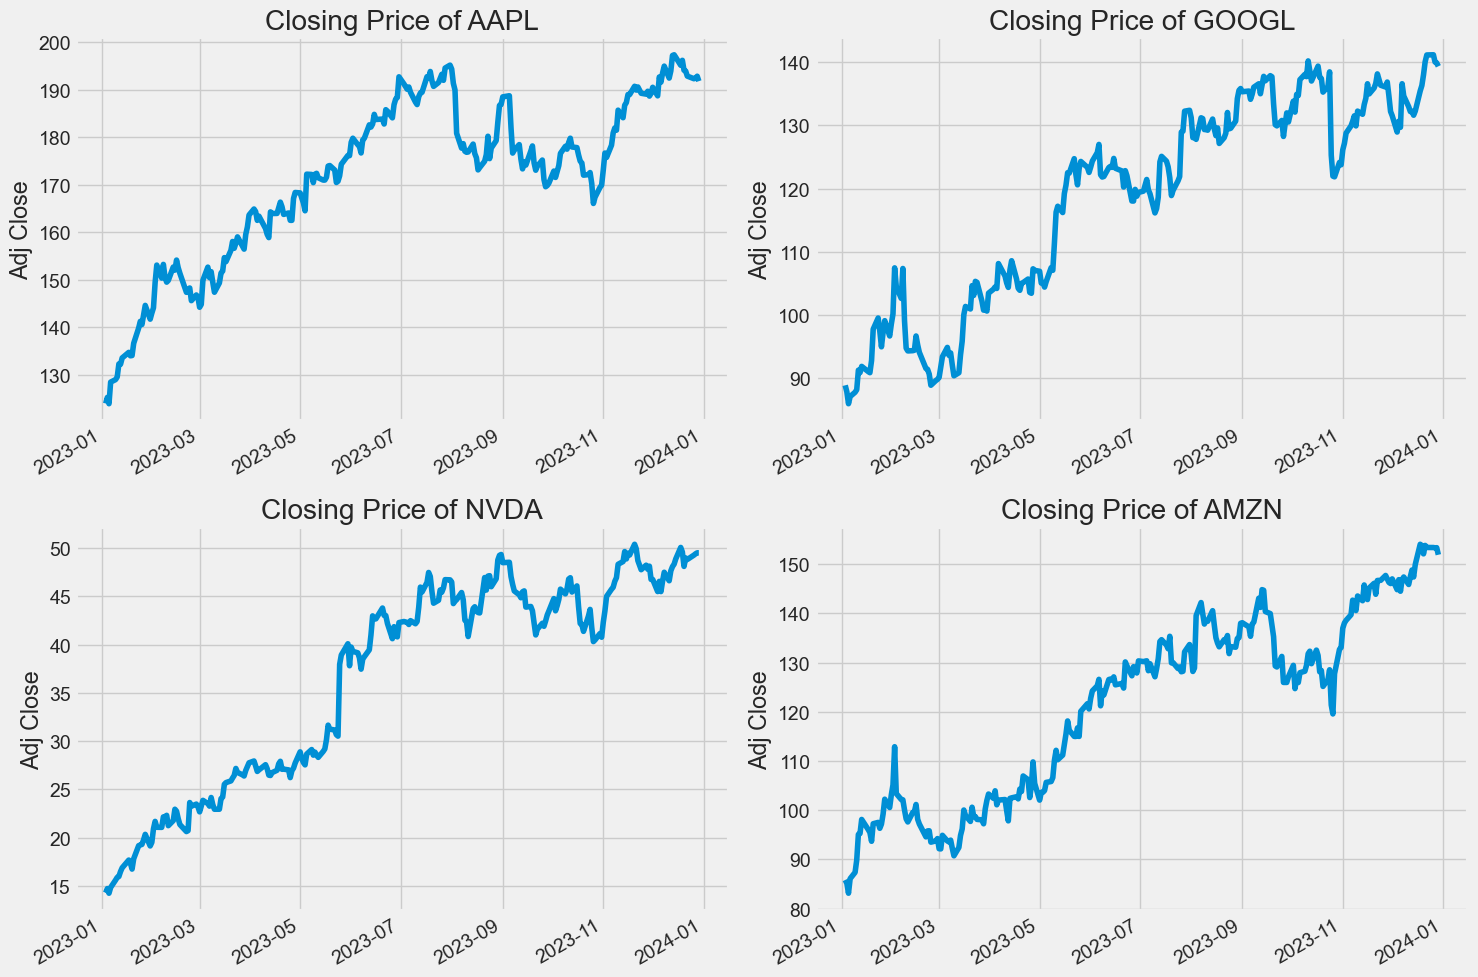

In [1046]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

    plt.tight_layout()

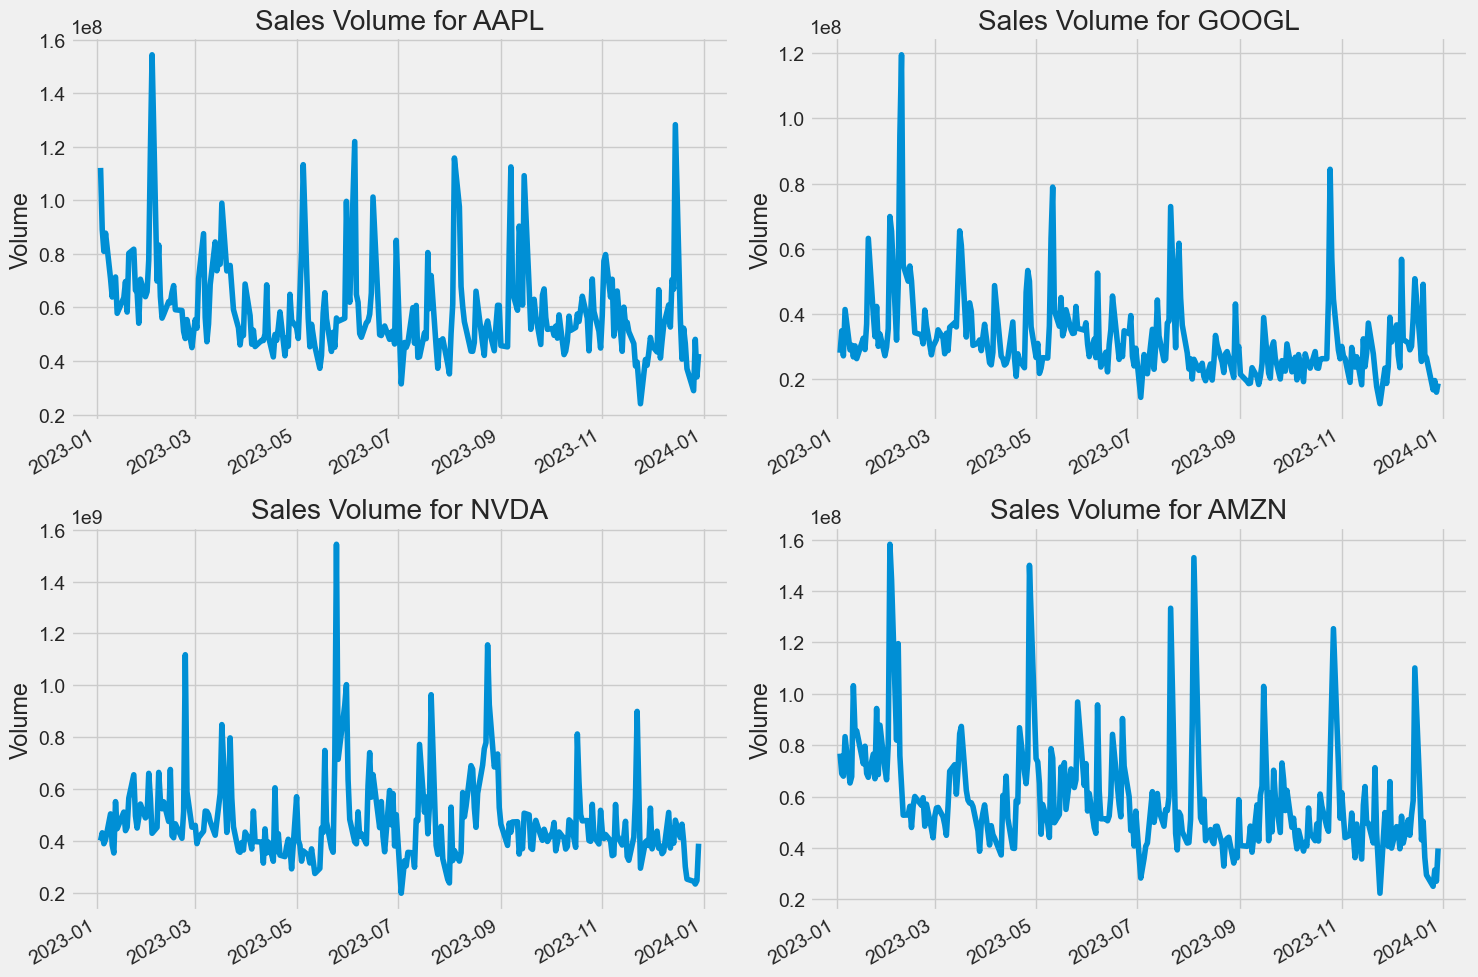

In [1047]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

    plt.tight_layout()

<Axes: xlabel='Date'>

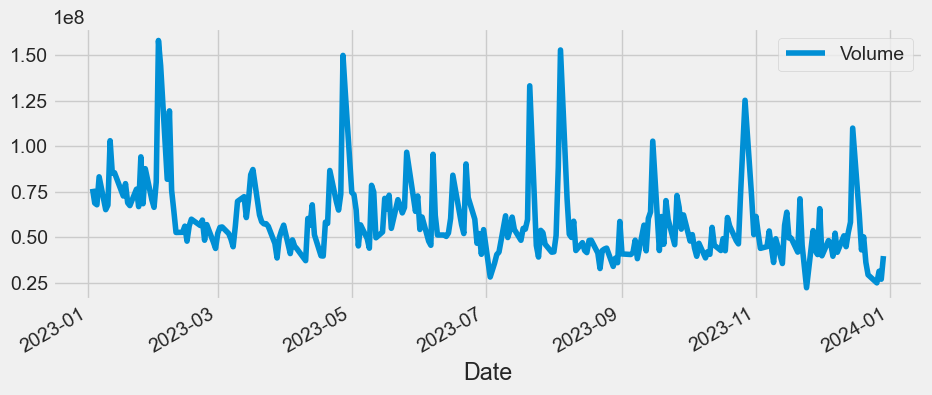

In [1049]:
# Now let's plot the total volume of stock being traded each day over the past year
AMZN['Volume'].plot(legend=True, figsize=(10,4))

In [1050]:
# Let's go ahead and plot out several moving averages
MA_day = [10, 20, 50, 100]
for ma in MA_day:
    column_name = "MA for %s days" % ma
    AMZN[column_name] = AMZN['Close'].rolling(window=ma).mean()


<Axes: xlabel='Date'>

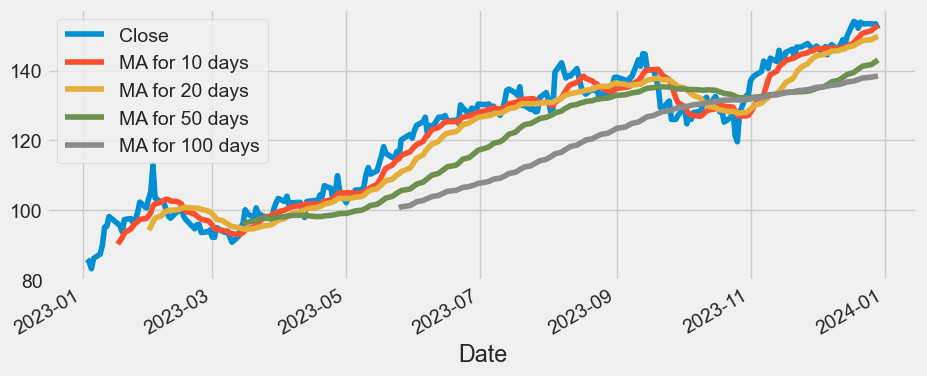

In [1051]:
labels_ma=['Close',
'MA for 10 days',
'MA for 20 days',
'MA for 50 days',
'MA for 100 days']
AMZN[labels_ma].plot(subplots=False,figsize=(10,4))

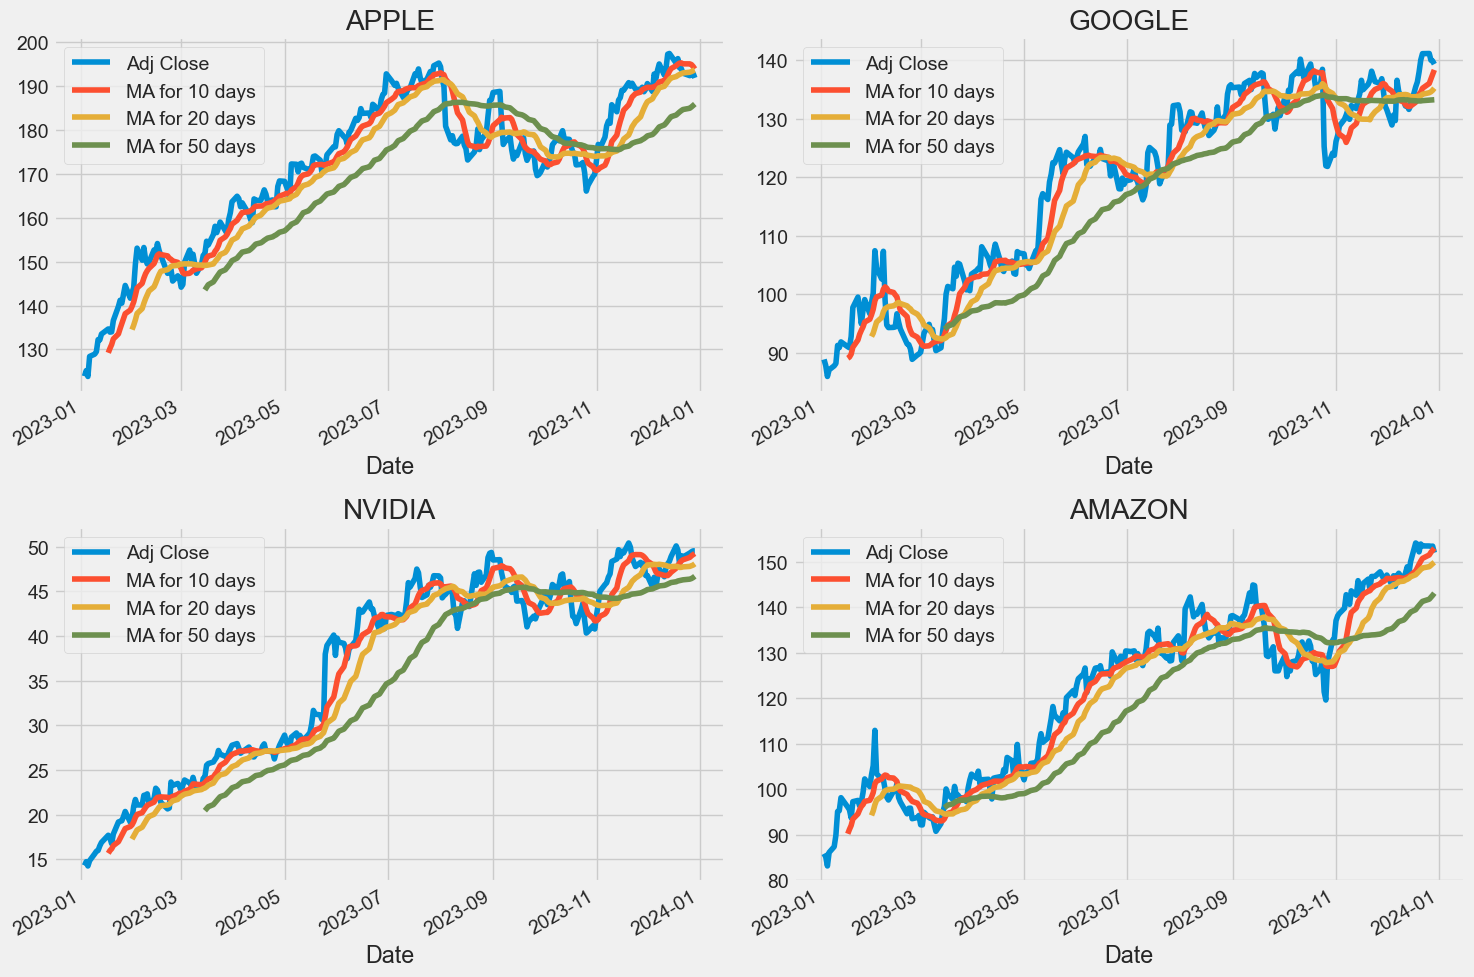

In [1052]:
import matplotlib.pyplot as plt

# Assuming you have a list of DataFrames named company_list with DataFrames for each company
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot each company's data on its respective subplot
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

GOOGL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('NVIDIA')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()


<Axes: xlabel='Date'>

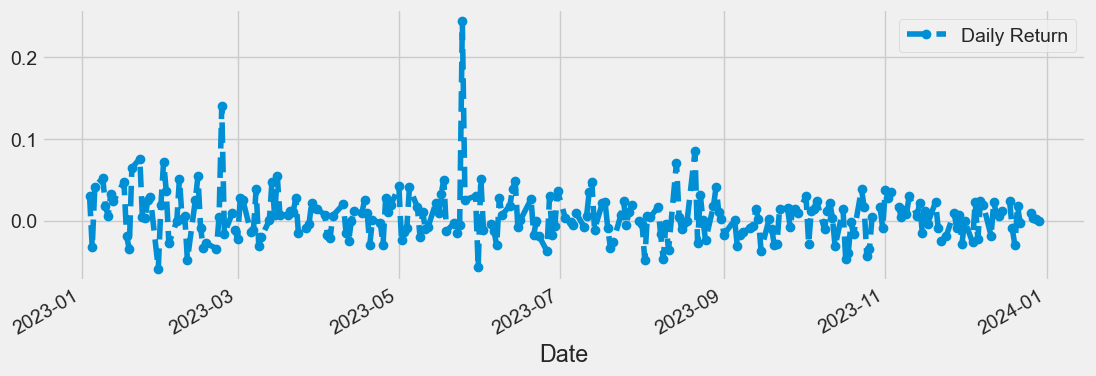

In [1053]:
# We'll use pct_change to find the percent change for each day
NVDA['Daily Return'] = NVDA['Close'].pct_change()
# Lets plot the daily return percentage
NVDA['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')


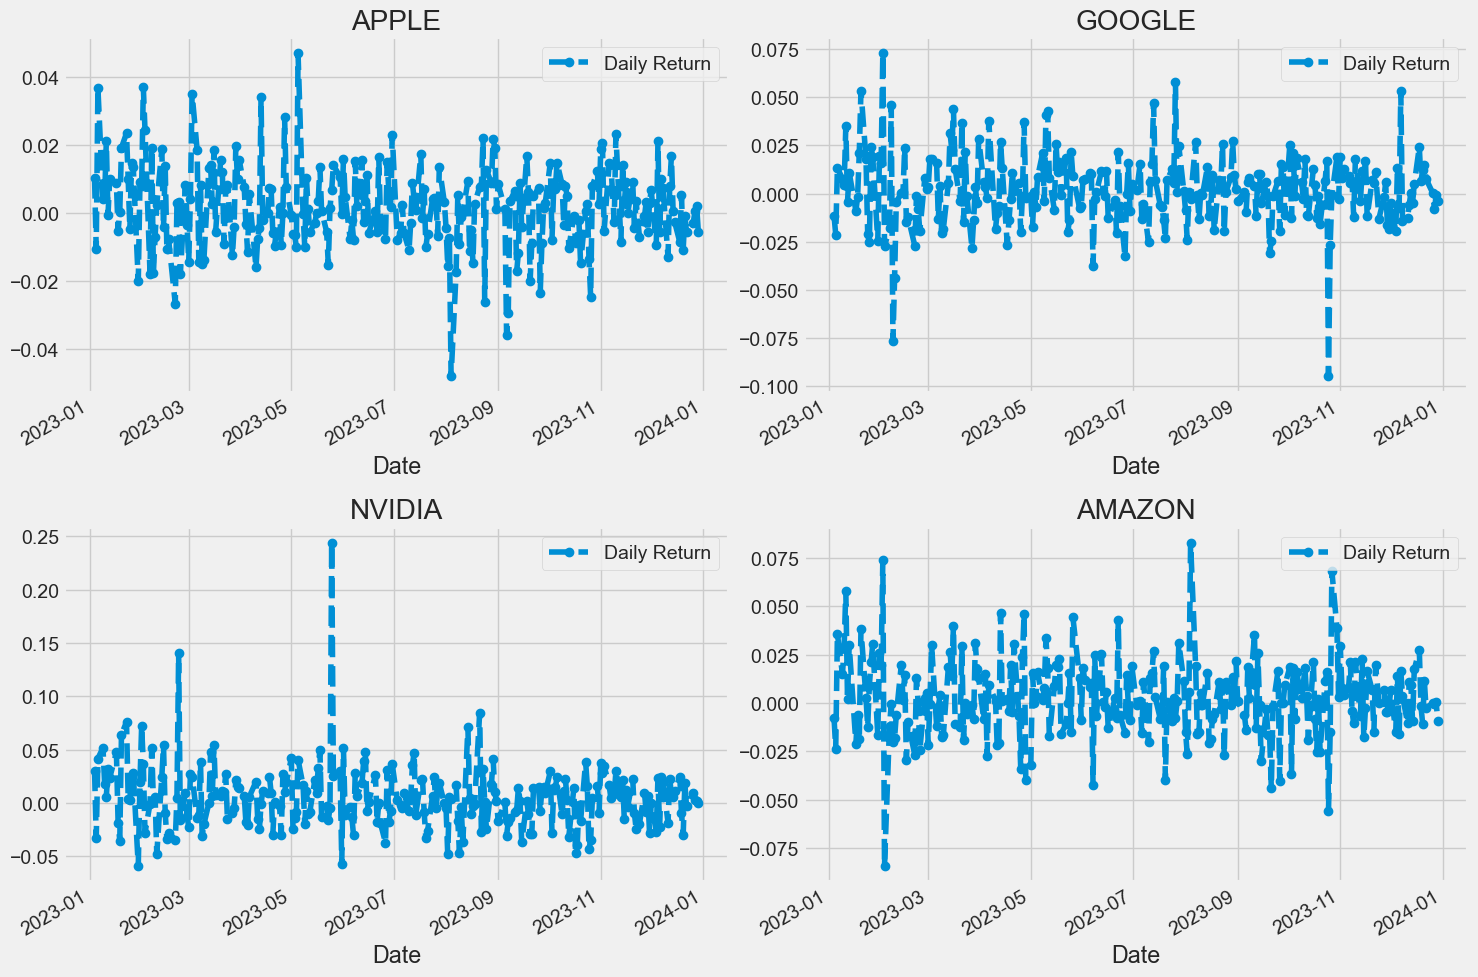

In [1054]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
GOOGL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
NVDA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NVIDIA')
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days',
       'Daily Return'],
      dtype='object')


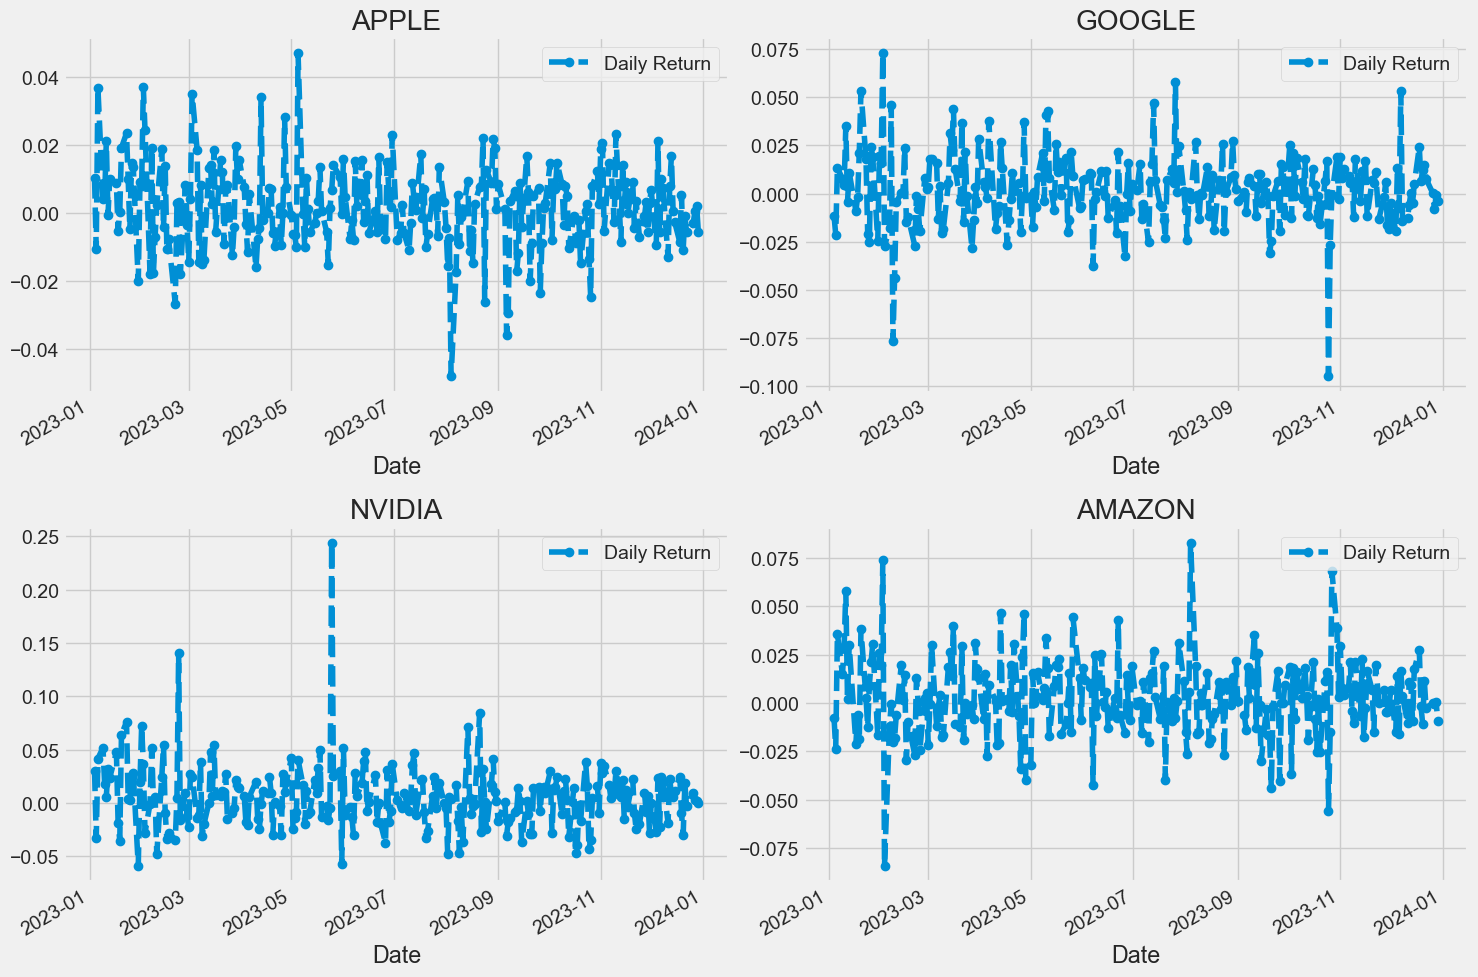

In [1055]:
import matplotlib.pyplot as plt

# Assuming company_list is a list of DataFrames including AAPL, GOOGL, NVDA, AMZN
# Create 'Daily Return' column for each DataFrame
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Check if 'Daily Return' column is present
for company in company_list:
    print(company.columns)

# Create the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot daily returns for each company
AAPL['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

GOOGL['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

NVDA['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('NVIDIA')

AMZN['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()


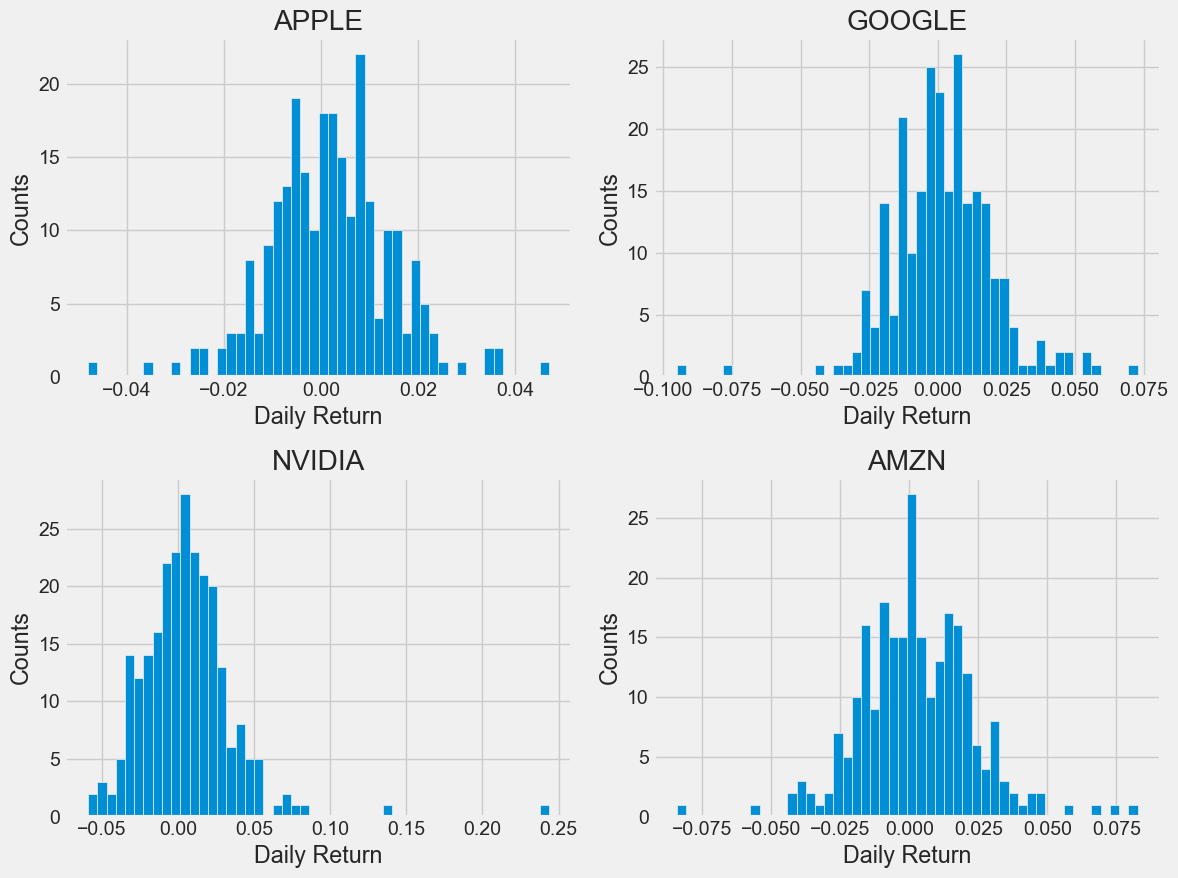

In [1056]:
plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

    plt.tight_layout()

<Axes: >

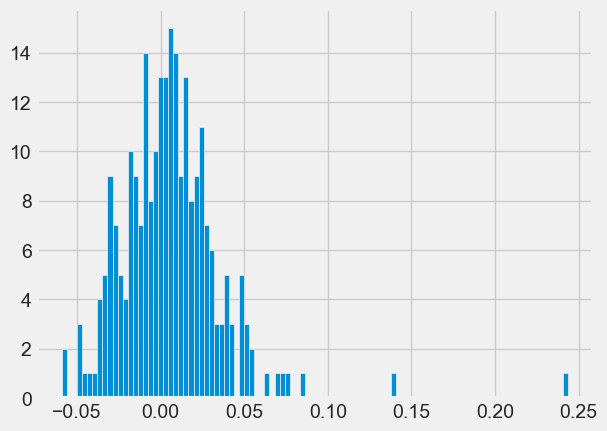

In [1057]:
# Only histogram for NVDIA
NVDA['Daily Return'].hist(bins=100)

<Axes: xlabel='Daily Return', ylabel='Density'>

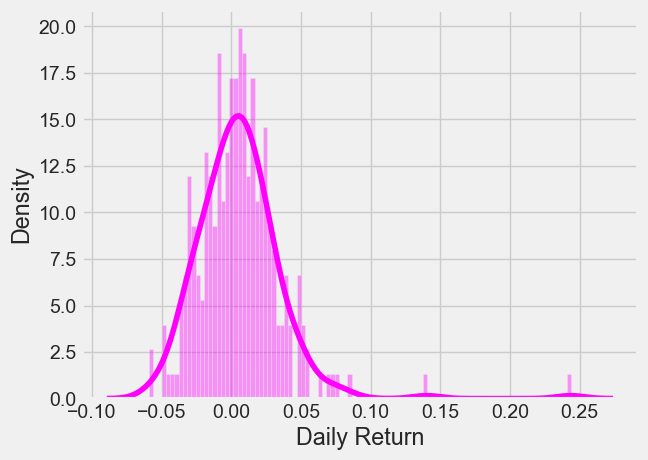

In [1058]:
sns.distplot(NVDA['Daily Return'].dropna(), bins=100, color='magenta')

In [1064]:
# Grab all the closing prices for the tech stock list into one DataFrame
closingprice_df=pdr.get_data_yahoo(tech_list, start, end)['Close']
closingprice_df.head(10)

AttributeError: 'NoneType' object has no attribute 'group'

In [1062]:
import yfinance as yf

# Download data using yfinance
closingprice_df = yf.download(tech_list, start=start, end=end)['Close']
print(closingprice_df.head(10))

[*********************100%***********************]  4 of 4 completed

Ticker                           AAPL       AMZN      GOOGL       NVDA
Date                                                                  
2023-01-03 00:00:00+00:00  125.070000  85.820000  89.120003  14.315000
2023-01-04 00:00:00+00:00  126.360001  85.139999  88.080002  14.749000
2023-01-05 00:00:00+00:00  125.019997  83.120003  86.199997  14.265000
2023-01-06 00:00:00+00:00  129.619995  86.080002  87.339996  14.859000
2023-01-09 00:00:00+00:00  130.149994  87.360001  88.019997  15.628000
2023-01-10 00:00:00+00:00  130.729996  89.870003  88.419998  15.909000
2023-01-11 00:00:00+00:00  133.490005  95.089996  91.519997  16.000999
2023-01-12 00:00:00+00:00  133.410004  95.269997  91.129997  16.511000
2023-01-13 00:00:00+00:00  134.759995  98.120003  92.120003  16.899000
2023-01-17 00:00:00+00:00  135.940002  96.050003  91.290001  17.702000


In [1066]:
# Make a new tech returns DataFrame
tech_returns=closingprice_df.pct_change()
tech_returns.head()

Ticker                         AAPL      AMZN     GOOGL      NVDA
Date                                                             
2023-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN
2023-01-04 00:00:00+00:00  0.010314 -0.007924 -0.011670  0.030318
2023-01-05 00:00:00+00:00 -0.010605 -0.023726 -0.021344 -0.032816
2023-01-06 00:00:00+00:00  0.036794  0.035611  0.013225  0.041640
2023-01-09 00:00:00+00:00  0.004089  0.014870  0.007786  0.051753

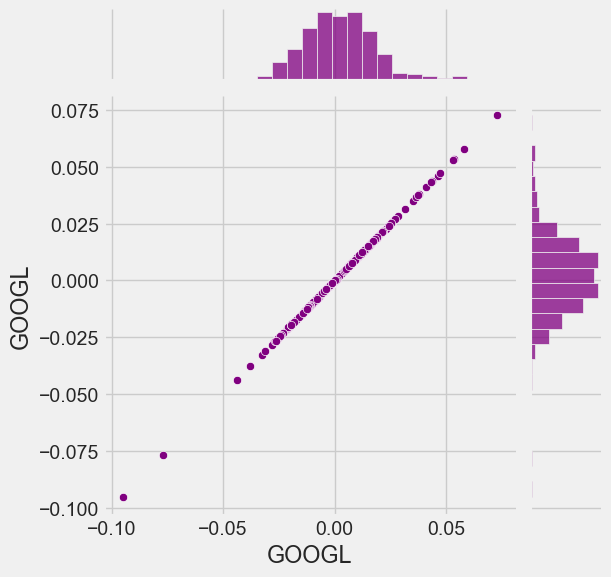

In [1068]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='purple')

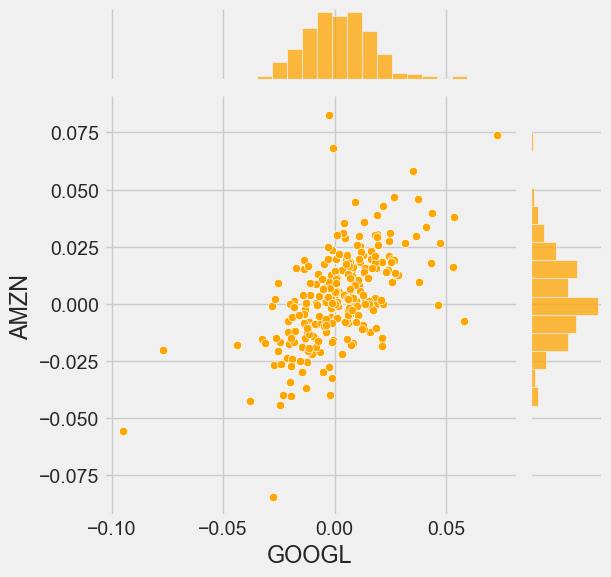

In [1072]:
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='scatter', color='orange')

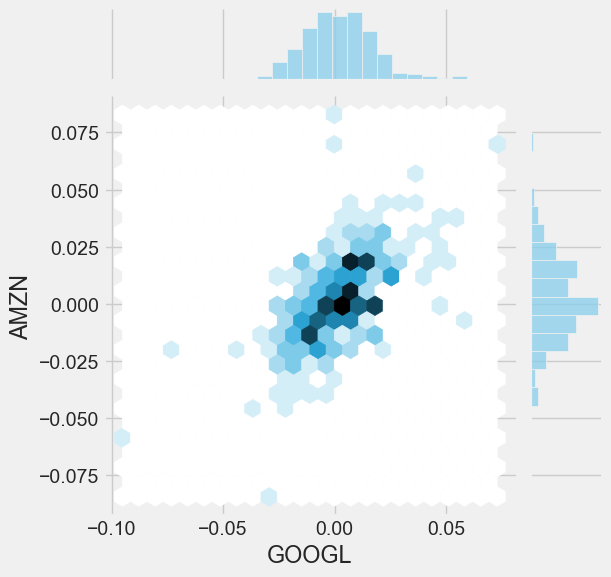

In [1074]:
# with Hex plot
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='hex', color='skyblue')

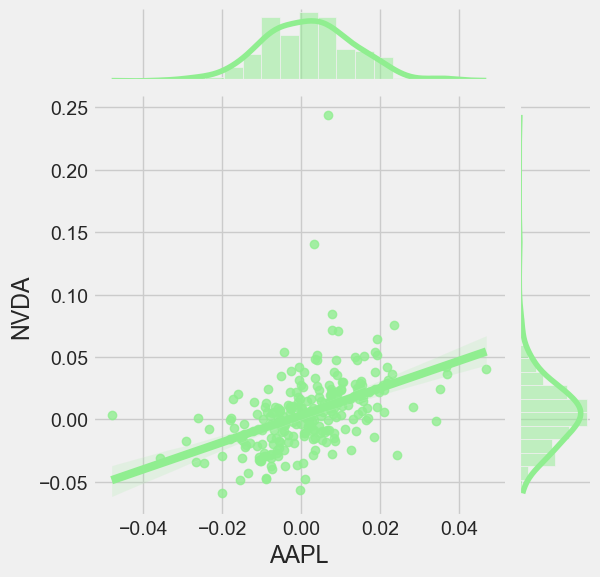

In [1076]:
# Lets check out for Apple and Nvidia with reg jointplot
sns.jointplot(x='AAPL', y='NVDA', data=tech_returns, kind='reg', color='lightgreen')

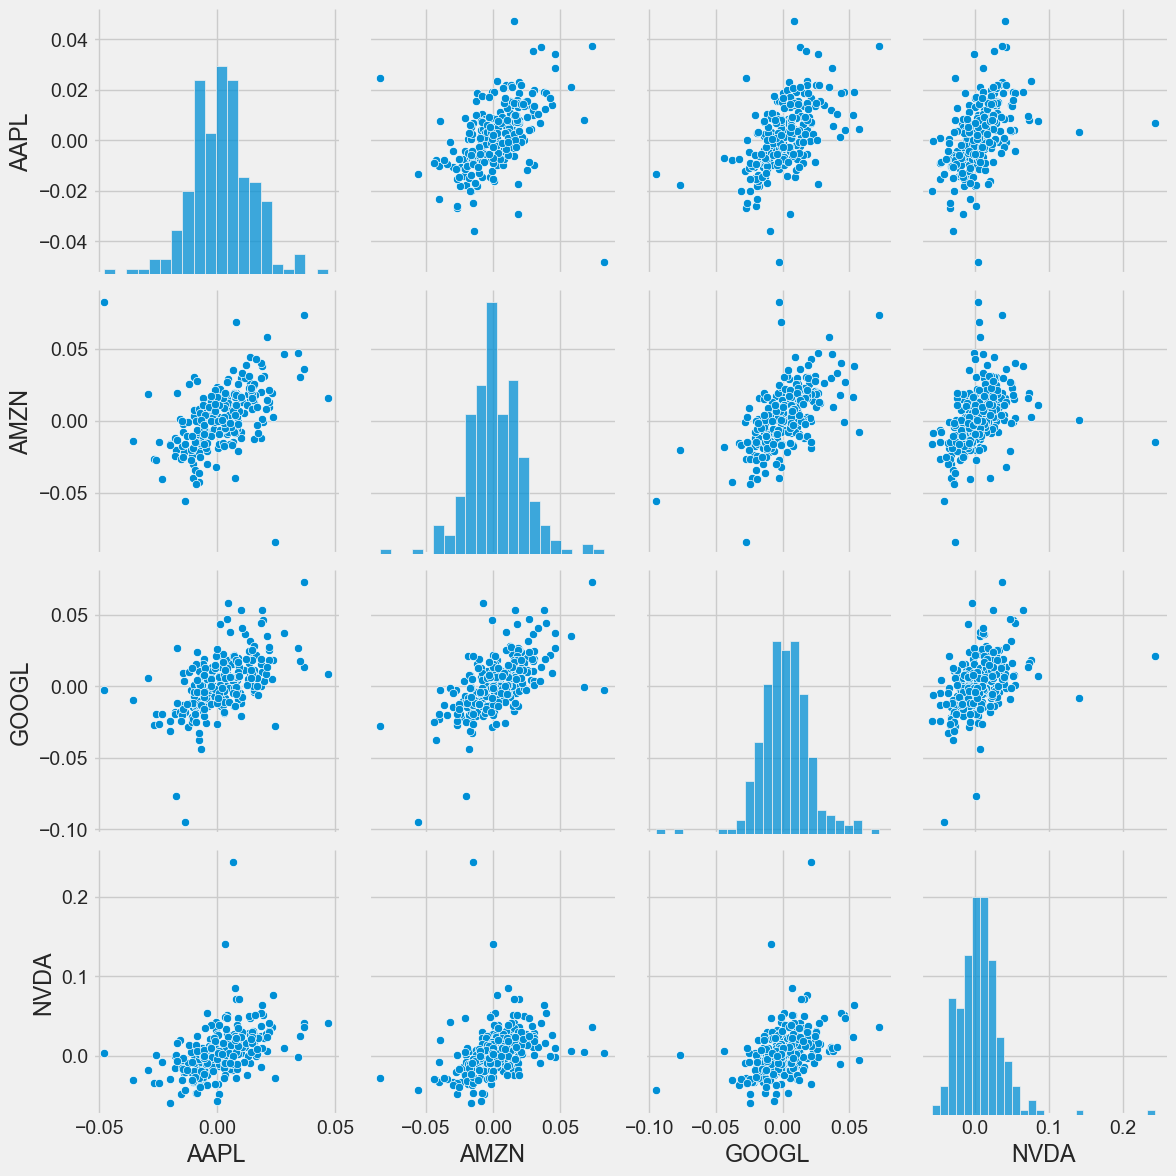

In [1078]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

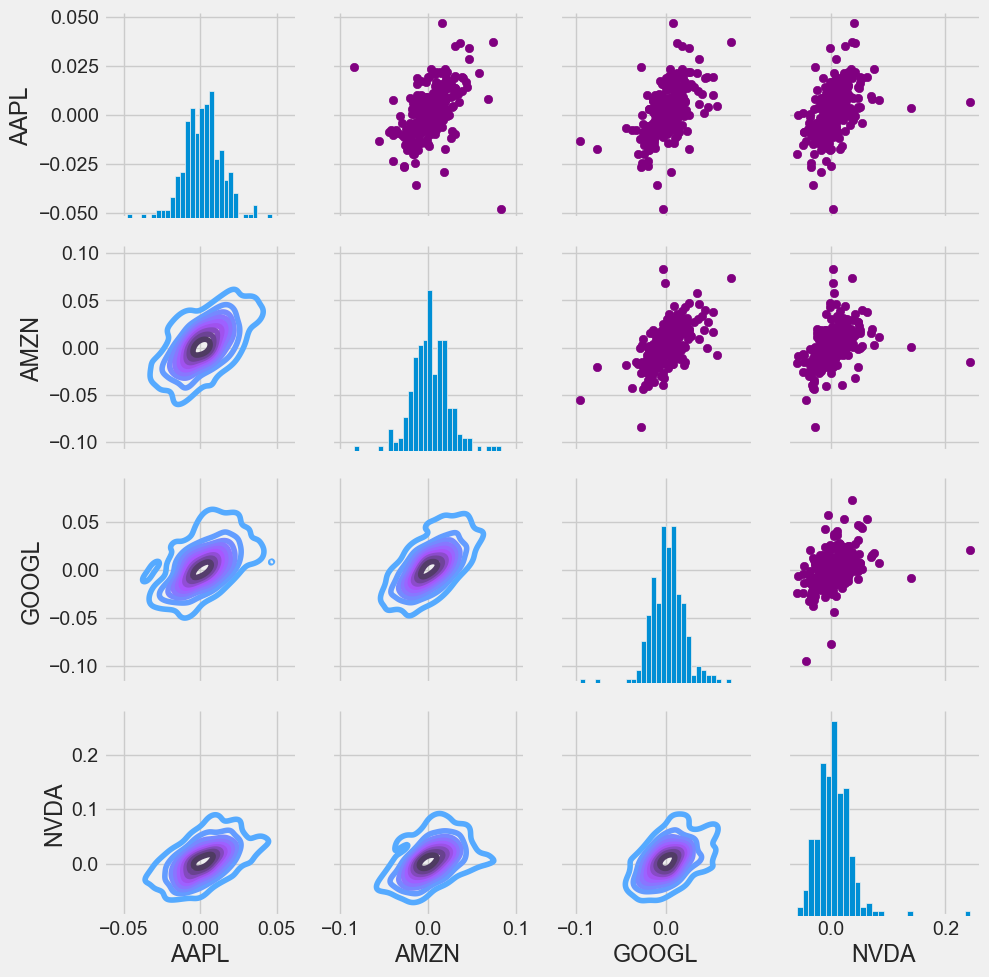

In [1082]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())
# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')
# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

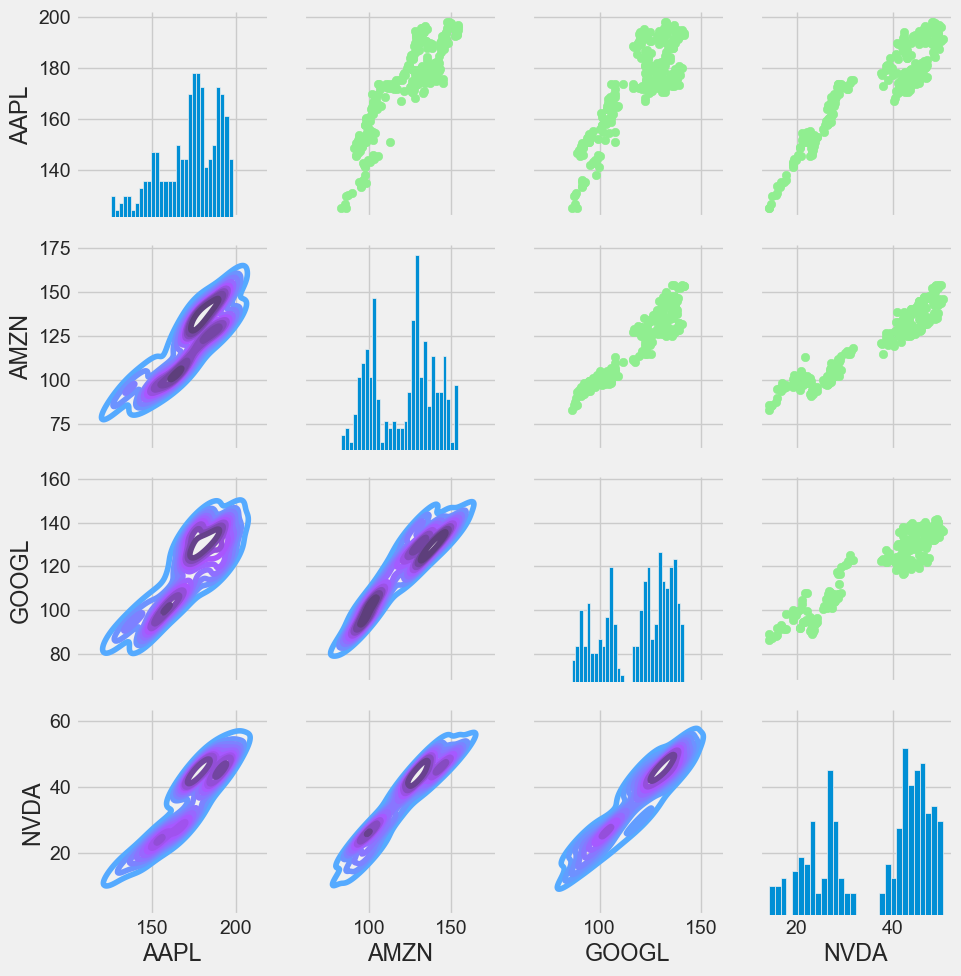

In [1084]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())
# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='lightgreen')
# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [1086]:
# Compute the correlation matrix
cm_tech_returns=tech_returns.corr()
cm_tech_returns

Ticker      AAPL      AMZN     GOOGL      NVDA
Ticker                                        
AAPL    1.000000  0.442150  0.528196  0.446381
AMZN    0.442150  1.000000  0.600858  0.380434
GOOGL   0.528196  0.600858  1.000000  0.405963
NVDA    0.446381  0.380434  0.405963  1.000000

<Axes: xlabel='Ticker', ylabel='Ticker'>

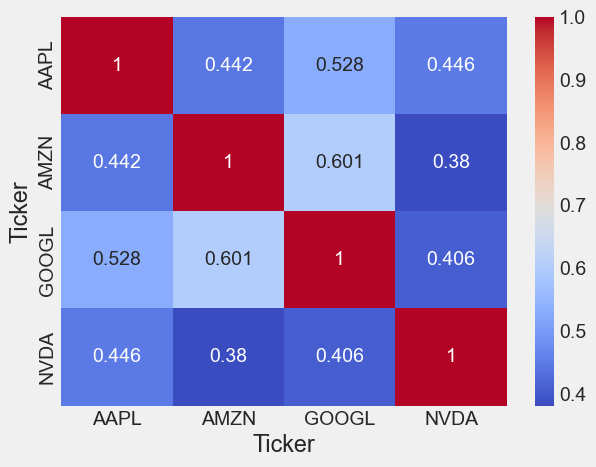

In [1088]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the st
sns.heatmap(cm_tech_returns,annot=True,fmt=".3g",cmap='coolwarm')

In [1090]:
# Lets check out the correlation between closing prices of stocks
cm_closing=closingprice_df.corr()
cm_closing

Ticker      AAPL      AMZN     GOOGL      NVDA
Ticker                                        
AAPL    1.000000  0.881090  0.851049  0.918985
AMZN    0.881090  1.000000  0.939586  0.955786
GOOGL   0.851049  0.939586  1.000000  0.947392
NVDA    0.918985  0.955786  0.947392  1.000000

<Axes: xlabel='Ticker', ylabel='Ticker'>

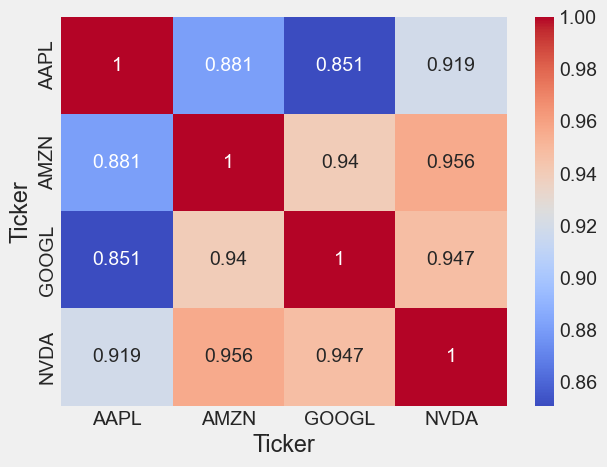

In [1092]:
sns.heatmap(cm_closing, annot=True, fmt=".3g", cmap='coolwarm')


In [1094]:
# Let's start by defining a new DataFrame as a cleaned version of the original tech_returns DataFrame
rets=tech_returns.dropna()
rets.head(10)

Ticker                         AAPL      AMZN     GOOGL      NVDA
Date                                                             
2023-01-04 00:00:00+00:00  0.010314 -0.007924 -0.011670  0.030318
2023-01-05 00:00:00+00:00 -0.010605 -0.023726 -0.021344 -0.032816
2023-01-06 00:00:00+00:00  0.036794  0.035611  0.013225  0.041640
2023-01-09 00:00:00+00:00  0.004089  0.014870  0.007786  0.051753
2023-01-10 00:00:00+00:00  0.004456  0.028732  0.004544  0.017981
2023-01-11 00:00:00+00:00  0.021112  0.058084  0.035060  0.005783
2023-01-12 00:00:00+00:00 -0.000599  0.001893 -0.004261  0.031873
2023-01-13 00:00:00+00:00  0.010119  0.029915  0.010864  0.023500
2023-01-17 00:00:00+00:00  0.008756 -0.021097 -0.009010  0.047518
2023-01-18 00:00:00+00:00 -0.005370 -0.006143 -0.001862 -0.018359

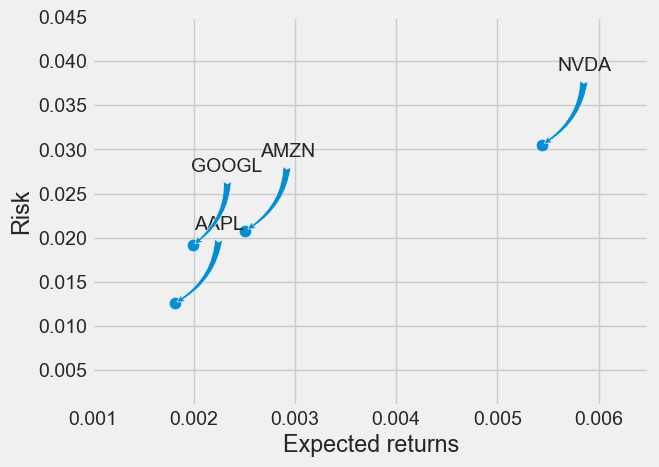

In [1098]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area=np.pi*20
plt.scatter(rets.mean(), rets.std(), s=area)
# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([0.001, 0.0065])
plt.ylim([0.001, 0.045])
# Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')
# Label the scatter plots, for more info on how this is done, check out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(50, 50),
        textcoords='offset points',
        ha='right',
        va='bottom',
       arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3, rad=-0.3')
    )

<Axes: xlabel='Daily Return', ylabel='Density'>

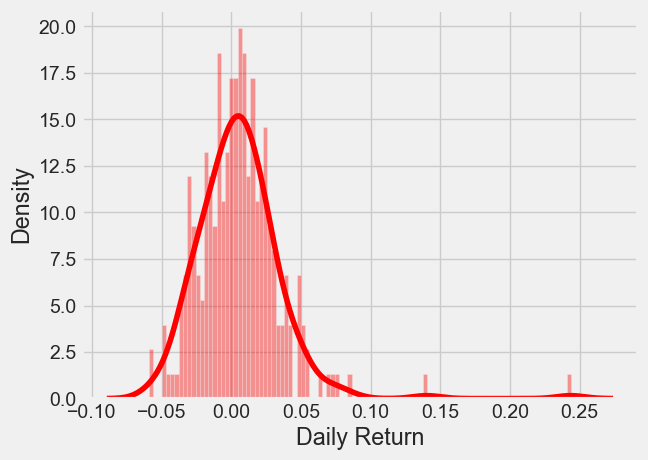

In [1100]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(NVDA['Daily Return'].dropna(), bins=100, color='red')

In [1102]:
# The 0.05 empirical quantile of daily returns
# For NVDA stocks
rets['NVDA'].quantile(0.05)

-0.03457554798209332

In [1112]:
emp_quantile=0.05
print(f"The {emp_quantile} empirical quantile of daily returns is at {np.round(ret)}

SyntaxError: unterminated f-string literal (detected at line 2) (497310703.py, line 2)

In [1116]:
emp_quantile = 0.05
# Assuming `ret` is the variable containing the value to be rounded
print(f"The {emp_quantile} empirical quantile of daily returns is at {np.round(rets, 2)}")


The 0.05 empirical quantile of daily returns is at Ticker                     AAPL  AMZN  GOOGL  NVDA
Date                                              
2023-01-04 00:00:00+00:00  0.01 -0.01  -0.01  0.03
2023-01-05 00:00:00+00:00 -0.01 -0.02  -0.02 -0.03
2023-01-06 00:00:00+00:00  0.04  0.04   0.01  0.04
2023-01-09 00:00:00+00:00  0.00  0.01   0.01  0.05
2023-01-10 00:00:00+00:00  0.00  0.03   0.00  0.02
...                         ...   ...    ...   ...
2023-12-22 00:00:00+00:00 -0.01 -0.00   0.01 -0.00
2023-12-26 00:00:00+00:00 -0.00 -0.00   0.00  0.01
2023-12-27 00:00:00+00:00  0.00 -0.00  -0.01  0.00
2023-12-28 00:00:00+00:00  0.00  0.00  -0.00  0.00
2023-12-29 00:00:00+00:00 -0.01 -0.01  -0.00  0.00

[249 rows x 4 columns]


In [1110]:
rets["AMZN"].quantile(0.05)

-0.02731209661029126

In [1118]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.025085873013623906

In [1120]:
# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.017176473412086814

In [1122]:
rets.head()

Ticker                         AAPL      AMZN     GOOGL      NVDA
Date                                                             
2023-01-04 00:00:00+00:00  0.010314 -0.007924 -0.011670  0.030318
2023-01-05 00:00:00+00:00 -0.010605 -0.023726 -0.021344 -0.032816
2023-01-06 00:00:00+00:00  0.036794  0.035611  0.013225  0.041640
2023-01-09 00:00:00+00:00  0.004089  0.014870  0.007786  0.051753
2023-01-10 00:00:00+00:00  0.004456  0.028732  0.004544  0.017981

In [1124]:
# Set up our time horizon
days=365
# Now our delta
dt=1/days
# Now let's grab our mu (drift) from the expected return data we got for Google
mu=rets.mean()['GOOGL']
# Now let's grab the volatility of the stock from the std() of the average return for Google
sigma=rets.std()['GOOGL']

In [1140]:
def stock_monte_carlo(start_price, days, mu, sigma):
       
    '''
    This function takes in starting stock price, days of simulation, mu, sigma,
    and returns simulated price array
    '''
    
 
# Define a price array
    price=np.zeros(days)
    price[0]=start_price
 
# Shok and Drift
    shock=np.zeros(days)
    drift=np.zeros(days)
 
# Run price array for number of days
    for x in range(1, days):
        # Calculate shock
        shock[x]=np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        # Calculate drift
        drift[x]=mu*dt
        # Calculate Price
        price[x]=price[x-1]+(price[x-1]*drift[x]+shock[x])
 
    return price

In [1142]:
GOOGL.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-01-03  89.589996  91.050003  88.519997  89.120003  88.899872  28131200   
2023-01-04  90.349998  90.650002  87.269997  88.080002  87.862434  34854800   
2023-01-05  87.470001  87.570000  85.900002  86.199997  85.987083  27194400   
2023-01-06  86.790001  87.690002  84.860001  87.339996  87.124260  41381500   
2023-01-09  88.360001  90.050003  87.860001  88.019997  87.802582  29003900   

           company_name  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                      
2023-01-03       GOOGLE             NaN             NaN             NaN   
2023-01-04       GOOGLE             NaN             NaN             NaN   
2023-01-05       GOOGLE             NaN             NaN             NaN   
2023-01-06       GOOGLE             NaN             NaN             NaN   
2023-01-09       GOOGLE             NaN             NaN             NaN   

            Daily Return  
Date                      
2023-01-03           NaN  
2023-01-04     -0.011670  
2023-01-05     -0.021344  
2023-01-06      0.013225  
2023-01-09      0.007786

In [1144]:
start_price=GOOGL.iloc[0, GOOGL.columns.get_loc('Open')]
start_price

89.58999633789062

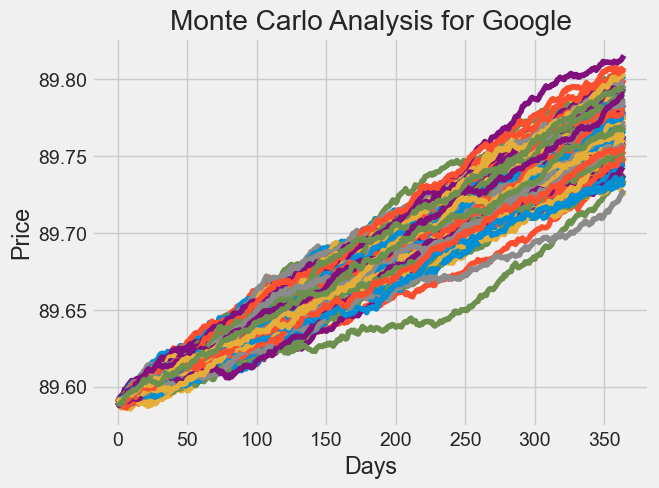

In [1148]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
 
    plt.xlabel("Days")
    plt.ylabel("Price") 
    plt.title('Monte Carlo Analysis for Google')

In [1158]:
def monte_carlo_analysis_market(market_list, days=365, dt=1/days):
    for item in market_list:
        rets[item].quantile(0.05)
        mu=rets.mean()[item]
        sigma=rets.std()[item]
 
        new_item=globals()[item]
        start_price=new_item.iloc[0, new_item.columns.get_loc('Open')]
 
        # Show the loading DataFrame
        print(f'\nStock Name {item}:')
        print(new_item.head())
        
        for run in range(100):
           plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
 
        plt.xlabel("Days")
        plt.ylabel("Price") 
        plt.title(f'Monte Carlo Analysis for {item}')
        plt.show()


Stock Name AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904617   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855103   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412216   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937302   

               Volume company_name  MA for 10 days  MA for 20 days  \
Date                                                                 
2023-01-03  112117500        APPLE             NaN             NaN   
2023-01-04   89113600        APPLE             NaN             NaN   
2023-01-05   80962700        APPLE             NaN             NaN   
2023-01-06   87754700        APPLE             NaN             NaN   
2023-01-09   70790800        APPLE         

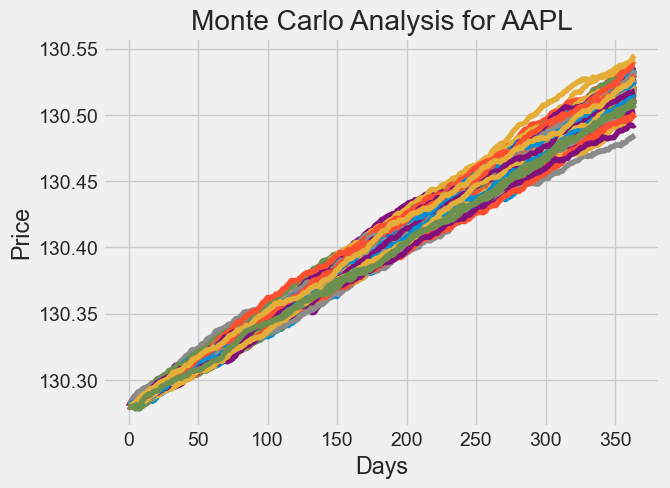


Stock Name GOOGL:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-01-03  89.589996  91.050003  88.519997  89.120003  88.899872  28131200   
2023-01-04  90.349998  90.650002  87.269997  88.080002  87.862434  34854800   
2023-01-05  87.470001  87.570000  85.900002  86.199997  85.987083  27194400   
2023-01-06  86.790001  87.690002  84.860001  87.339996  87.124260  41381500   
2023-01-09  88.360001  90.050003  87.860001  88.019997  87.802582  29003900   

           company_name  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                      
2023-01-03       GOOGLE             NaN             NaN             NaN   
2023-01-04       GOOGLE             NaN             NaN             NaN   
2023-01-05       GOOGLE             NaN             NaN             NaN   
2023-01-06       GOOGLE             NaN             

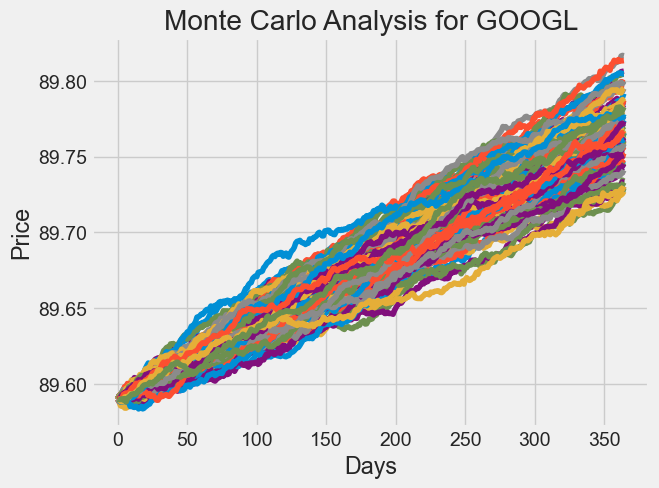


Stock Name NVDA:
              Open    High     Low   Close  Adj Close     Volume company_name  \
Date                                                                            
2023-01-03  14.851  14.996  14.096  14.315  14.305580  401277000       NVIDIA   
2023-01-04  14.567  14.853  14.241  14.749  14.739295  431324000       NVIDIA   
2023-01-05  14.491  14.564  14.148  14.265  14.255615  389168000       NVIDIA   
2023-01-06  14.474  15.010  14.034  14.859  14.849223  405044000       NVIDIA   
2023-01-09  15.284  16.056  15.141  15.628  15.617718  504231000       NVIDIA   

            MA for 10 days  MA for 20 days  MA for 50 days  Daily Return  
Date                                                                      
2023-01-03             NaN             NaN             NaN           NaN  
2023-01-04             NaN             NaN             NaN      0.030318  
2023-01-05             NaN             NaN             NaN     -0.032816  
2023-01-06             NaN             

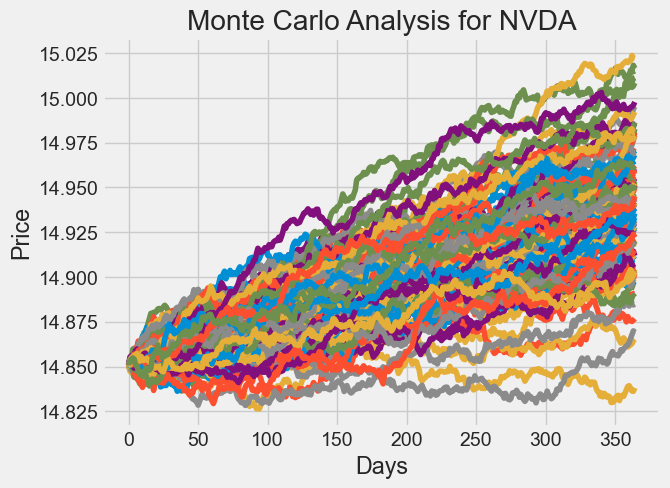


Stock Name AMZN:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-01-03  85.459999  86.959999  84.209999  85.820000  85.820000  76706000   
2023-01-04  86.550003  86.980003  83.360001  85.139999  85.139999  68885100   
2023-01-05  85.330002  85.419998  83.070000  83.120003  83.120003  67930800   
2023-01-06  83.029999  86.400002  81.430000  86.080002  86.080002  83303400   
2023-01-09  87.459999  89.480003  87.080002  87.360001  87.360001  65266100   

           company_name  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                      
2023-01-03         AMZN             NaN             NaN             NaN   
2023-01-04         AMZN             NaN             NaN             NaN   
2023-01-05         AMZN             NaN             NaN             NaN   
2023-01-06         AMZN             NaN             N

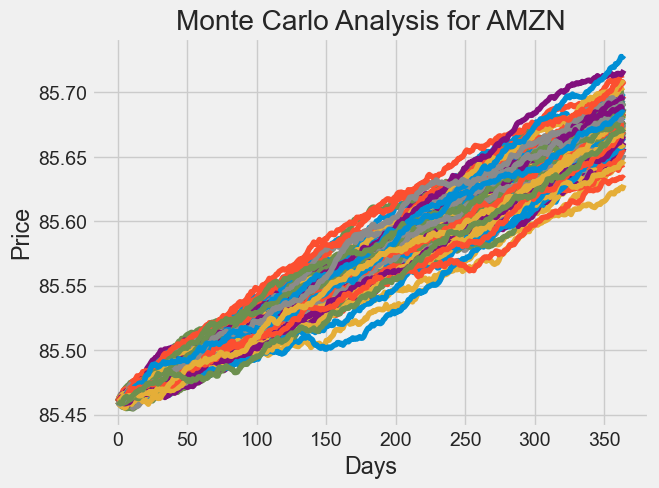

In [1160]:
monte_carlo_analysis_market(market_list=tech_list)

In [1164]:
# Lets start with Google stock price
start_price=GOOGL.iloc[0, GOOGL.columns.get_loc('Open')]
# Set a large number of runs
runs=10000
rets['GOOGL'].quantile(0.05)
mu=rets.mean()['GOOGL']
sigma=rets.std()['GOOGL']
# Create an empty matrix to hold the end price data
simulations=np.zeros(runs)
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock (GOOGL) after 365 days')

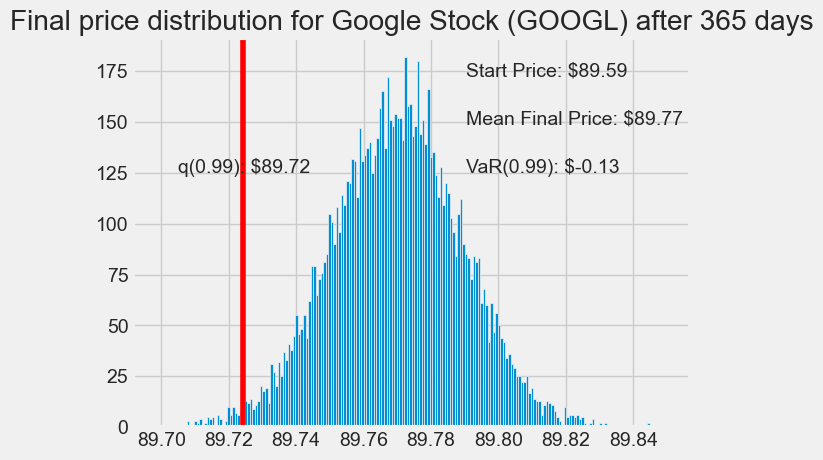

In [1166]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should 
q=np.percentile(simulations, 1)
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)
# Using plt.figtext to fill in some additional information onte the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)
# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price-q))
# To display 1% quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' % q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
# Plot title
plt.title("Final price distribution for Google Stock (GOOGL) after %s days" % days,)

In [1170]:
# Lets start with Amazon stock price
start_price=AMZN.iloc[0, AMZN.columns.get_loc('Open')]
# Set a large number of runs
runs=10000
rets['AMZN'].quantile(0.05)
mu=rets.mean()['AMZN']
sigma=rets.std()['AMZN']
# Create an empty matrix to hold the end price data
simulations=np.zeros(runs)
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock (AMZN) after 365 days')

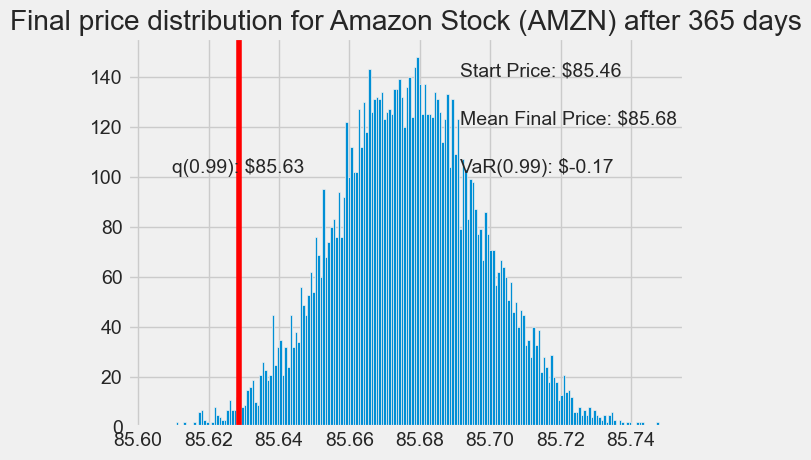

In [1172]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should 
q=np.percentile(simulations, 1)
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)
# Using plt.figtext to fill in some additional information onte the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)
# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price-q))
# To display 1% quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' % q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
# Plot title
plt.title("Final price distribution for Amazon Stock (AMZN) after %s days" % days,)

In [1174]:
# Lets start with Apple stock price
start_price=AAPL.iloc[0, AAPL.columns.get_loc('Open')]
# Set a large number of runs
runs=10000
rets['AAPL'].quantile(0.05)
mu=rets.mean()['AAPL']
sigma=rets.std()['AAPL']
# Create an empty matrix to hold the end price data
simulations=np.zeros(runs)
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock (AAPL) after 365 days')

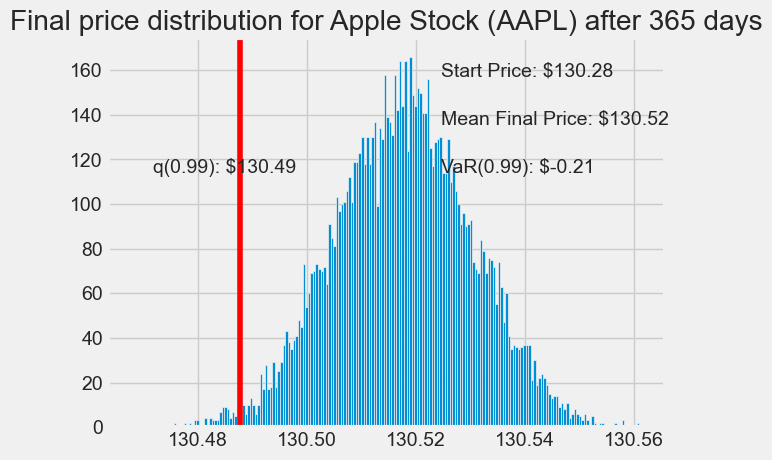

In [1178]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should 
q=np.percentile(simulations, 1)
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)
# Using plt.figtext to fill in some additional information onte the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)
# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price-q))
# To display 1% quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' % q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
# Plot title
plt.title("Final price distribution for Apple Stock (AAPL) after %s days" % days)

In [1180]:
# Lets start with Nvidia stock price
start_price=NVDA.iloc[0, NVDA.columns.get_loc('Open')]
# Set a large number of runs
runs=10000
rets['NVDA'].quantile(0.05)
mu=rets.mean()['NVDA']
sigma=rets.std()['NVDA']
# Create an empty matrix to hold the end price data
simulations=np.zeros(runs)
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Nvidia Stock (NVDA) after 365 days')

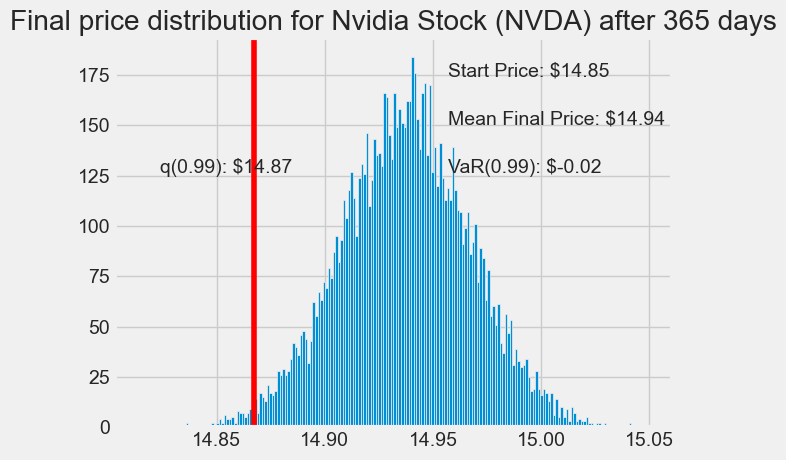

In [1182]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should 
q=np.percentile(simulations, 1)
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)
# Using plt.figtext to fill in some additional information onte the plot
# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)
# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price-q))
# To display 1% quantile
plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' % q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
# Plot title
plt.title("Final price distribution for Nvidia Stock (NVDA) after %s days" % days)

In [1186]:
# List of NYSE_stocks for analytics
NYSE_list=['JNJ','NKE','WMT']
# set up Start and End time for data grab
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)
#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker
for stock in NYSE_list:
    globals()[stock]=pdr.get_data_yahoo(stock, start, end)

AttributeError: 'NoneType' object has no attribute 'group'

In [1188]:
import yfinance as yf
import datetime

# List of NYSE stocks for analytics
NYSE_list = ['JNJ', 'NKE', 'WMT']

# Set up start and end time for data grab
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

# For-loop to grab Yahoo Finance data using yfinance
for stock in NYSE_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Now, you can access data for each stock, e.g., JNJ, NKE, WMT
print(JNJ.head())  # This will print the first few rows of the JNJ stock data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  176.160004  178.380005  176.009995  178.190002  168.979965   
2023-01-04  178.889999  180.190002  178.479996  180.130005  170.819687   
2023-01-05  179.020004  179.990005  178.410004  178.800003  169.558456   
2023-01-06  180.130005  180.929993  179.389999  180.250000  170.933487   
2023-01-09  179.300003  179.759995  175.179993  175.580002  166.504883   

             Volume  
Date                 
2023-01-03  6344900  
2023-01-04  9788800  
2023-01-05  6255300  
2023-01-06  5706000  
2023-01-09  7925300  


In [1190]:
JNJ.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  176.160004  178.380005  176.009995  178.190002  168.979965   
2023-01-04  178.889999  180.190002  178.479996  180.130005  170.819687   
2023-01-05  179.020004  179.990005  178.410004  178.800003  169.558456   
2023-01-06  180.130005  180.929993  179.389999  180.250000  170.933487   
2023-01-09  179.300003  179.759995  175.179993  175.580002  166.504883   

             Volume  
Date                 
2023-01-03  6344900  
2023-01-04  9788800  
2023-01-05  6255300  
2023-01-06  5706000  
2023-01-09  7925300

In [1192]:
JNJ.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   160.327280  161.368800  159.177520  160.295320  154.181188   
std      7.084839    7.220845    7.021195    7.112270    6.328144   
min    146.089996  147.240005  144.949997  145.600006  141.134109   
25%    154.984997  155.915001  153.779995  155.062500  149.874859   
50%    159.739998  160.415001  158.794998  159.529999  153.645752   
75%    164.332497  165.340004  163.075005  164.204998  157.761890   
max    180.130005  180.929993  179.389999  180.250000  170.933487   

             Volume  
count  2.500000e+02  
mean   1.119850e+07  
std    1.626071e+07  
min    3.351400e+06  
25%    5.830700e+06  
50%    6.943250e+06  
75%    9.349000e+06  
max    1.513195e+08

In [1194]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: title={'center': 'Closing Price - JNJ'}, xlabel='Date'>

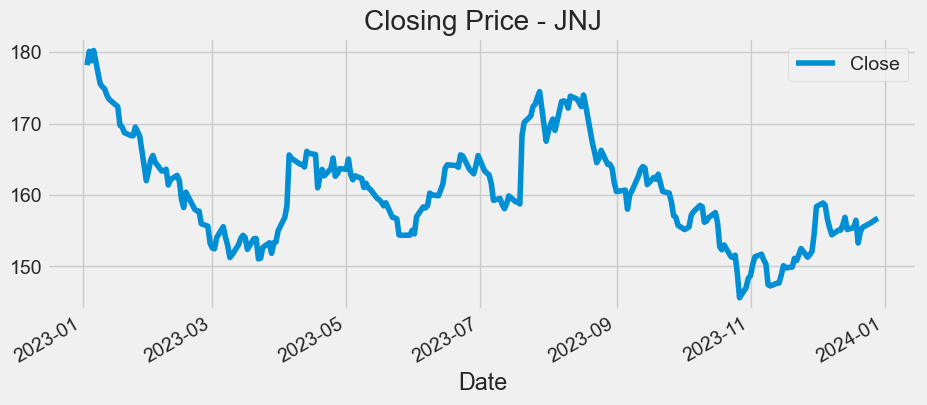

In [1196]:
# Let's see a historical view of the closing price for JNJ(Johnson & Johnson)
JNJ['Close'].plot(title="Closing Price - JNJ", legend=True, figsize=(10, 4))

<Axes: title={'center': 'Closing Price - NKE'}, xlabel='Date'>

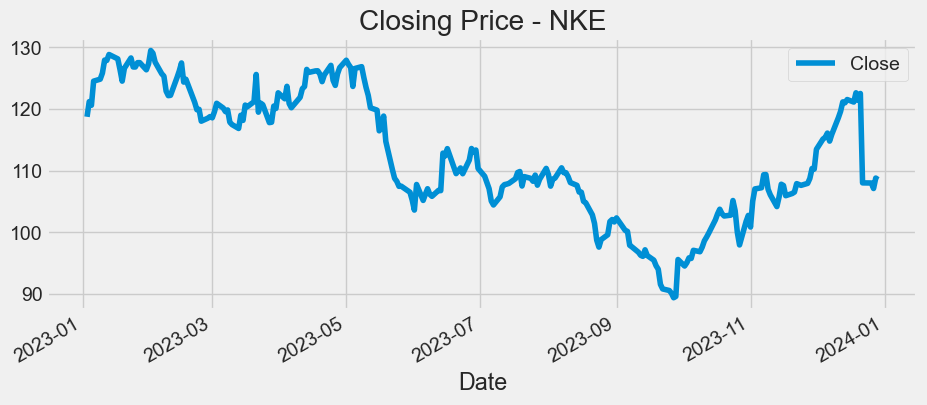

In [1198]:
# Let's see a historical view of the closing price for NKE (Nike Inc.)
NKE['Close'].plot(title="Closing Price - NKE", legend=True, figsize=(10, 4))

<Axes: title={'center': 'Closing Price - WMT'}, xlabel='Date'>

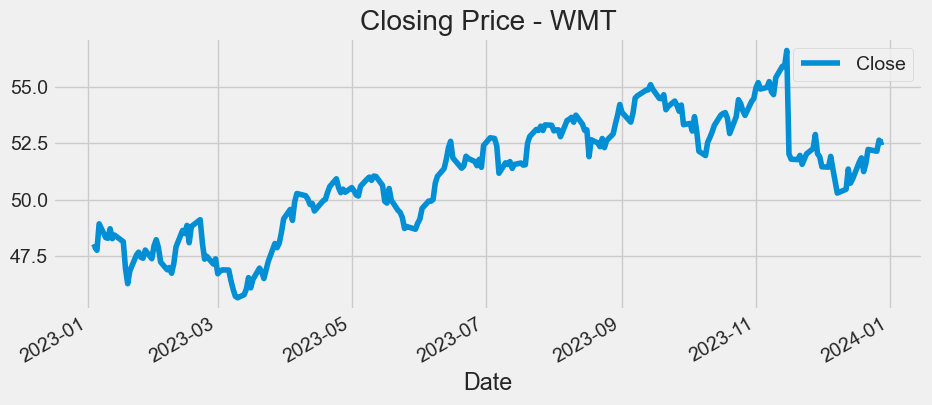

In [1200]:
# Let's see a historical view of the closing price for WMT (Wal-Mart Stores Inc)
WMT['Close'].plot(title="Closing Price - WMT", legend=True, figsize=(10, 4))

In [1202]:
# We'll use pct_change to find the percent change for each day
# For JNJ stocks
JNJ['Daily Return']=JNJ['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Density'>

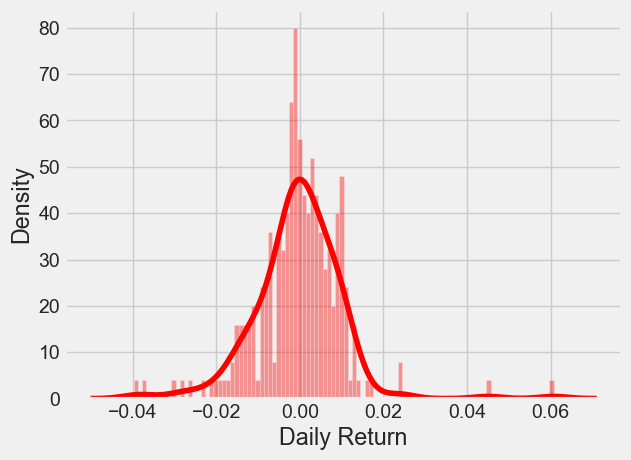

In [1204]:
# Note the use of dropna() here, atherwise the NaN values can't be read by seaborn
sns.distplot(JNJ['Daily Return'].dropna(), bins=100, color='red')

In [1206]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.01608573351886198

In [1208]:
# For WMT stocks
WMT['Daily Return']=WMT['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Density'>

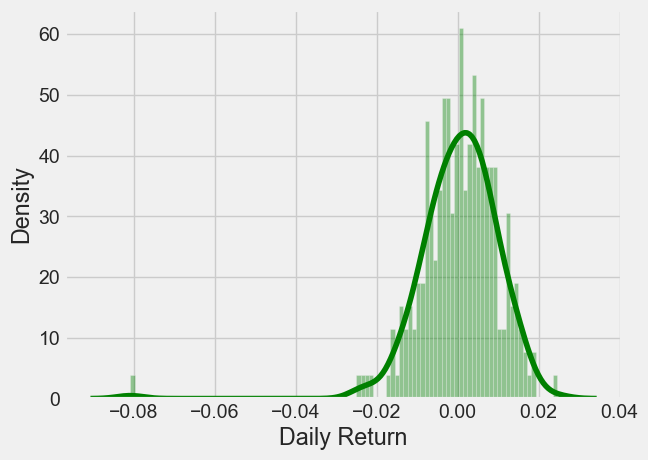

In [1210]:
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='green')

In [1212]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.01388923110529212

In [1214]:
# For NKE stocks
NKE['Daily Return']=NKE['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Density'>

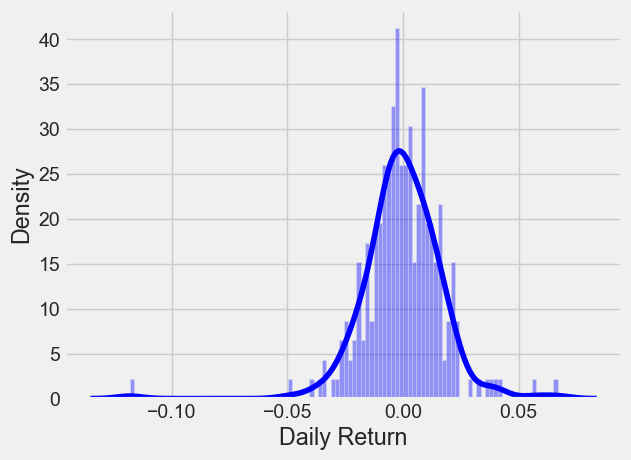

In [1216]:
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='blue')

In [1218]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.024143503582714533

In [1220]:
# Get the stock quote
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2023, 12, 31)
df=pdr.get_data_yahoo('MSFT', start, end)

AttributeError: 'NoneType' object has no attribute 'group'

In [1228]:
import yfinance as yf
import datetime

# Set the start and end date for data grab
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2023, 12, 31)

# Use yfinance to download data
df = yf.download('MSFT', start=start, end=end)

# Display the first few rows of the DataFrame
print(df.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  26.549999  26.959999  26.389999  26.770000  21.162369  64731500
2012-01-04  26.820000  27.469999  26.780001  27.400000  21.660404  80516100
2012-01-05  27.379999  27.730000  27.290001  27.680000  21.881748  56081400
2012-01-06  27.530001  28.190001  27.530001  28.110001  22.221676  99455500
2012-01-09  28.049999  28.100000  27.719999  27.740000  21.929178  59706800


In [1222]:
import yfinance as yf
import datetime

# List of NYSE stocks for analytics
NYSE_list = ['MSFT']

# Set up start and end time for data grab
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

# For-loop to grab Yahoo Finance data using yfinance
for stock in NYSE_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Now, you can access data for each stock, e.g., JNJ, NKE, WMT
print(MSFT.head())  # This will print the first few rows of the JNJ stock data


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  243.080002  245.750000  237.399994  239.580002  236.183517   
2023-01-04  232.279999  232.869995  225.960007  229.100006  225.852097   
2023-01-05  227.199997  227.550003  221.759995  222.309998  219.158356   
2023-01-06  223.000000  225.759995  219.350006  224.929993  221.741211   
2023-01-09  226.449997  231.240005  226.410004  227.119995  223.900146   

              Volume  
Date                  
2023-01-03  25740000  
2023-01-04  50623400  
2023-01-05  39585600  
2023-01-06  43613600  
2023-01-09  27369800  


KeyError: 'Close'

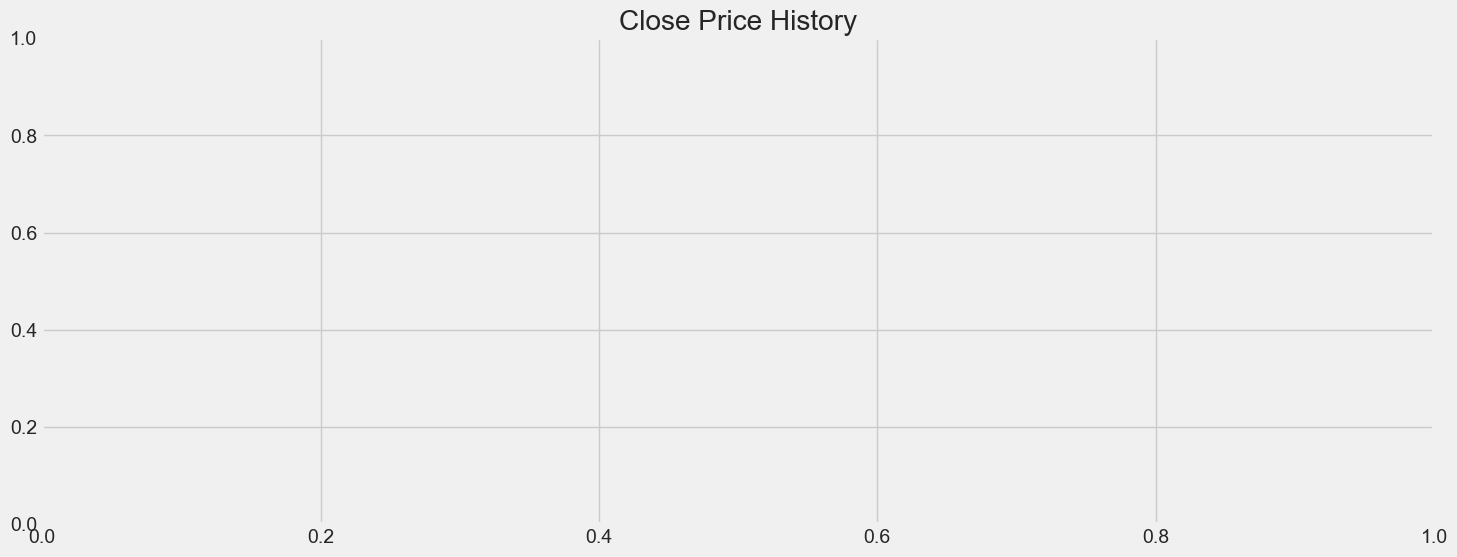

In [1226]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

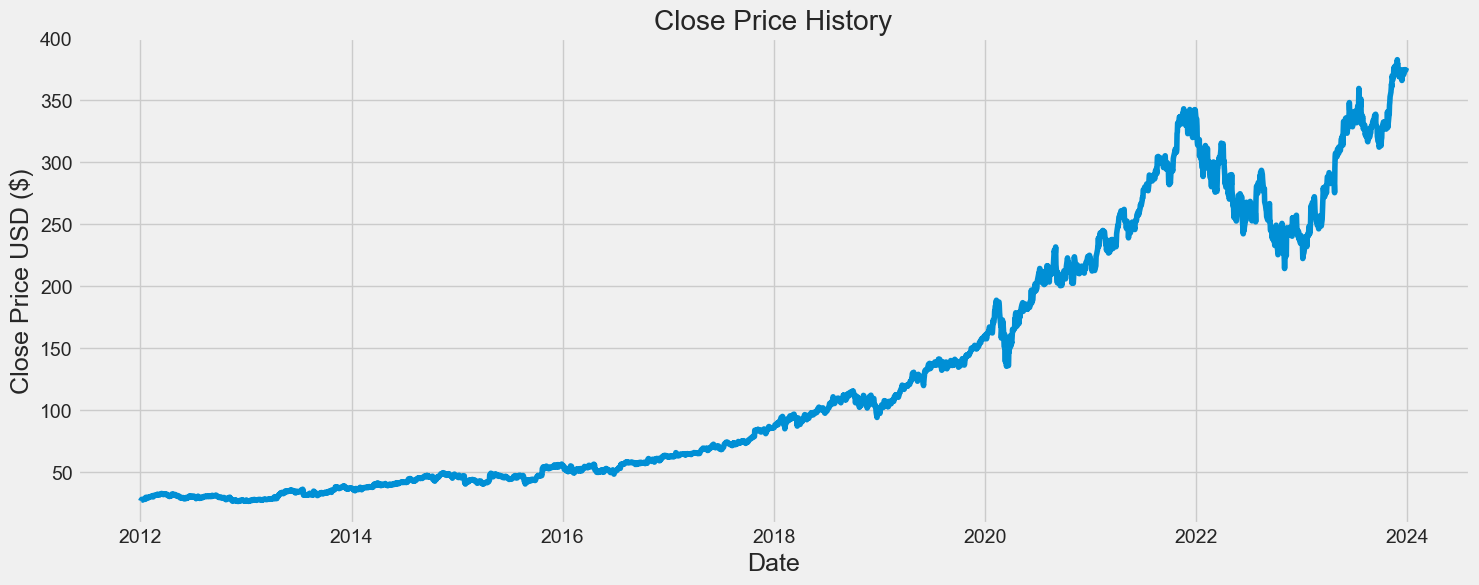

In [1230]:
import matplotlib.pyplot as plt

# Check for 'Close' or 'Adj Close'
if 'Close' in df.columns:
    close_col = 'Close'
elif 'Adj Close' in df.columns:
    close_col = 'Adj Close'
else:
    raise KeyError("Neither 'Close' nor 'Adj Close' found in the DataFrame")

# Plotting the Close/Adjusted Close Price History
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df[close_col])
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()


In [1232]:
# Create a new dataframe with only the 'Close' column
data=df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset=data.values
# Get the number of rows to train the model on
training_data_len=int(np.ceil(len(dataset)*0.95))
training_data_len

2868

In [1234]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00112255],
       [0.00289058],
       [0.00367637],
       ...,
       [0.97578086],
       [0.97917657],
       [0.98130945]])

In [1238]:
# Create the scaled training data set
train_data=scaled_data[0: int(training_data_len), :]
# Split the data into X_train and y_train datasets
X_train=[]
y_train=[]
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(X_train)
        print(y_train)
        print("-"*80)

[array([0.00112255, 0.00289058, 0.00367637, 0.00488311, 0.00384475,
       0.00412539, 0.00378862, 0.00457441, 0.00527601, 0.00530407,
       0.00521988, 0.00491118, 0.00937333, 0.00942946, 0.00833497,
       0.00895237, 0.00878399, 0.00802626, 0.00909269, 0.00886818,
       0.00987848, 0.01004687, 0.01086072, 0.01074846, 0.01116942,
       0.0120394 , 0.0123481 , 0.01159038, 0.01181489, 0.01088878,
       0.0103275 , 0.01380743, 0.01369517, 0.01422838, 0.0137513 ,
       0.01403194, 0.01434064, 0.01397581, 0.01543513, 0.0150703 ,
       0.01661381, 0.01602447, 0.01523868, 0.01456515, 0.01535094,
       0.01582802, 0.01577189, 0.01591222, 0.01768023, 0.01796088,
       0.01818538, 0.01748379, 0.01636124, 0.01577189, 0.01554738,
       0.01579996, 0.01582802, 0.01745573, 0.01725928, 0.01633317])]
[0.016136721323527004]
--------------------------------------------------------------------------------


In [1240]:
# Convert the X_train and y_train to numpy arrays
X_train, y_train=np.array(X_train), np.array(y_train)
# Reshape the data
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2808, 60, 1)

In [1242]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2)) # Adding dropout for regularization
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2)) # Adding dropout for regularization
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2)) # Adding dropout for regularization
model.add(Dense(32, activation='relu')) # Adding a dense layer with ReLU activation
model.add(Dense(1)) # Output layer
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")
# Summary of the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512,833 (1.96 MB)

 Trainable params: 512,833 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [1244]:
# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.0156 - val_loss: 0.0025
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 9.0956e-04 - val_loss: 0.0041
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 7.6259e-04 - val_loss: 0.0013
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 6.2571e-04 - val_loss: 0.0043
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 8.2524e-04 - val_loss: 0.0027
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 7.1479e-04 - val_loss: 0.0017
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 5.6726e-04 - val_loss: 0.0015
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 6.2616e-04 - val_loss: 0.0010
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 5.6017e-04 - val_loss: 0.0016
Epoch 12/50
79/79 ━━━━━━━━━━━━

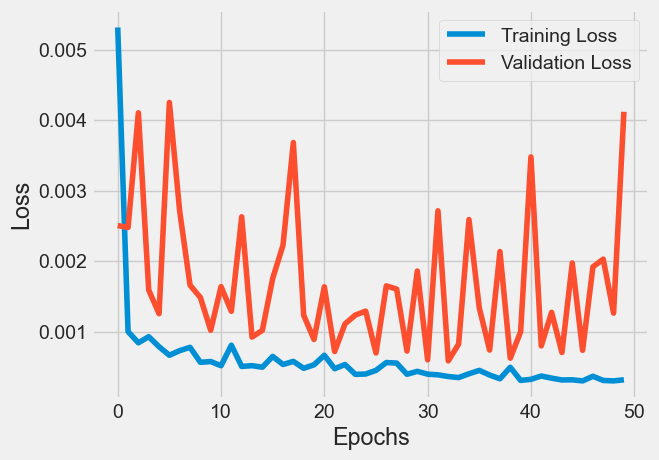

In [1245]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1256]:
# Create a new array containing scaled values from index 1543 to 2002 
test_data=scaled_data[training_data_len-60: , :]
# Create the data sets X_test and y_test
X_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60: i, 0])
    # Convert the data to a numpy array
    X_test=np.array(X_test)
    # Reshape the data
    X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # Get themodels predicted price values
    predictions=model.predict(X_test)
    predictions=scaler.inverse_transform(predictions)
    # Get the root mean squared error (RMSE)
    rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
    print(f"RMSE: {rmse}")

AttributeError: 'list' object has no attribute 'concat'

In [1258]:
# Assuming scaled_data and dataset are already defined
# training_data_len is the length of your training data
test_data = scaled_data[training_data_len-60:, :]  # Create the test data starting from 60 before the training length

# Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]  # Actual data for y_test

# Prepare X_test using a sliding window of 60 timesteps
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

# Convert X_test to a numpy array
X_test = np.array(X_test)

# Reshape the data to the format (number of samples, 60 timesteps, 1 feature)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(X_test)

# Invert scaling to get predictions in the original scale
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(f"RMSE: {rmse}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
RMSE: 39.72516844112882


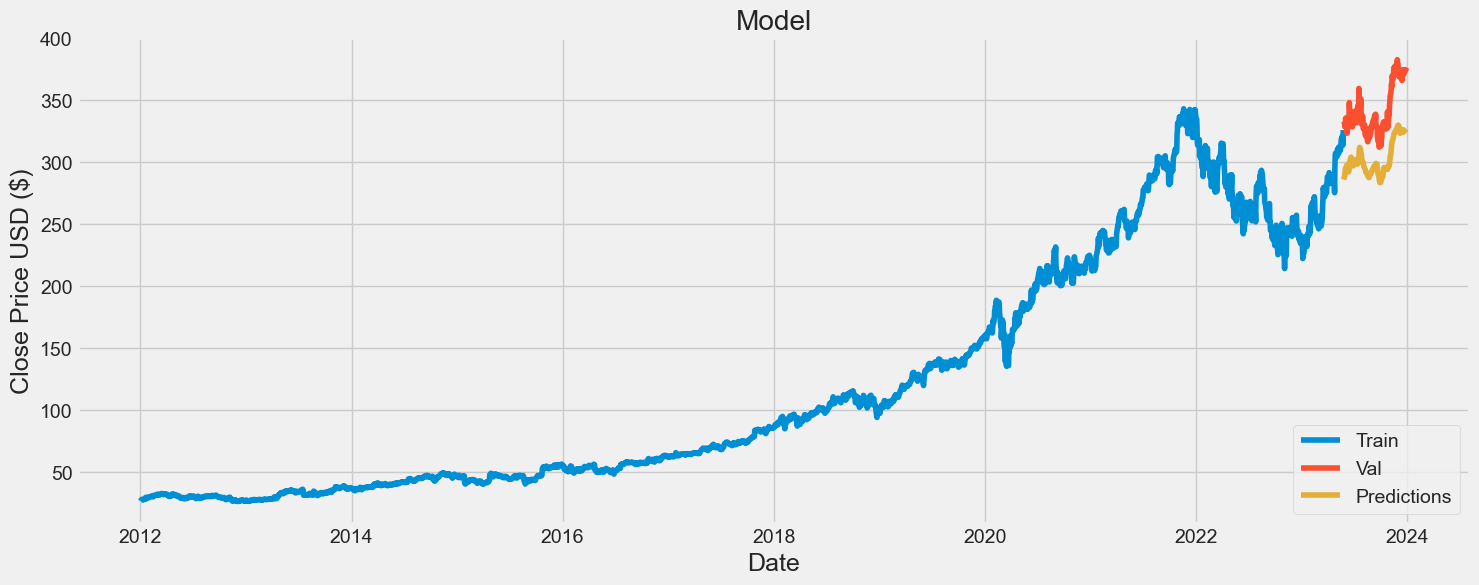

In [1260]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [1262]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2023-05-26  332.890015   286.004333
2023-05-30  331.209991   288.804413
2023-05-31  328.390015   292.045776
2023-06-01  332.579987   294.055267
2023-06-02  335.399994   295.315277
...                ...          ...
2023-12-22  374.579987   325.288330
2023-12-26  374.660004   325.895264
2023-12-27  374.070007   326.467712
2023-12-28  375.279999   326.754486
2023-12-29  376.040009   326.968445

[150 rows x 2 columns]

In [1264]:
# Save the model
model.save("stock_price_prediction_model.h5")

In [1266]:
# Load the saved model
loaded_model=load_model("stock_price_prediction_model.h5")